# 앙상블 모델 단일 모델 성능 비교
- 데이터 : load_breast_cancer
- 유형 : 지도학습 + 분류
- 방법 : LogisticRegression, DecisionTree(전처리 영향X), RandomForest

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split # 분리
import pandas as pd
import numpy as np

In [17]:
X, y = load_breast_cancer(as_frame = True, return_X_y=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=5)

In [19]:
X_train.shape, y_train.shape

((398, 30), (398,))

# <hr> 2. 학습진행

## 2-1 선형회귀 LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver="liblinear",random_state=5)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=5, solver='liblinear')

## 2-2 DecisionTree 알고리즘 기반 분류

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

## 2-3 Ensemble 알고리즘 기반 분류

In [30]:
from sklearn.ensemble import RandomForestClassifier # decision tree가 100개인 것

In [31]:
rf_model = RandomForestClassifier(random_state=5, oob_score=True)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

- 3개 알고리즘에 대한 모델 평가

In [26]:
print(f"[LogisticRegression] Train : {lr_model.score(X_train, y_train)} Test : {lr_model.score(X_test, y_test)}")

[LogisticRegression] Train : 0.9522613065326633 Test : 0.9590643274853801


In [32]:
print(f"[DecisionTreeClassifier] Train : {dt_model.score(X_train, y_train)} Test : {dt_model.score(X_test, y_test)}")

[DecisionTreeClassifier] Train : 1.0 Test : 0.9415204678362573


In [33]:
print(f"[RandomForestClassifier] Train : {rf_model.score(X_train, y_train)} Test : {rf_model.score(X_test, y_test)}")

[RandomForestClassifier] Train : 1.0 Test : 0.9766081871345029


In [48]:
featuresDF = pd.DataFrame(rf_model.feature_importances_, index=rf_model.feature_names_in_)
featuresDF = featuresDF.sort_values(0, ascending=False)

<Axes: >

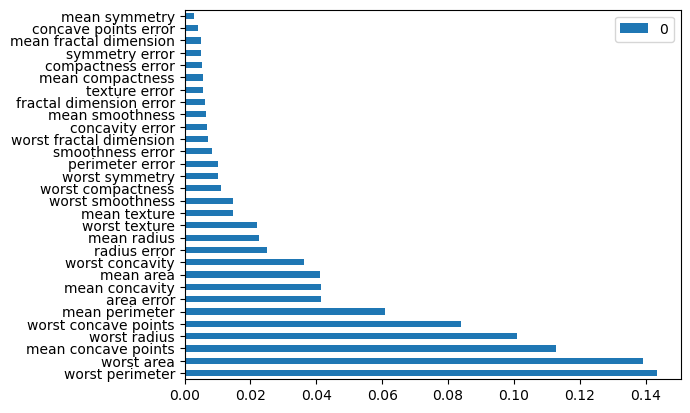

In [49]:
featuresDF.plot(kind="barh")

In [50]:
import lightgbm
# xgboost

In [51]:
import xgboost